In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('./telescope_data.csv', index_col=0)

In [33]:
df.dropna()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [35]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [39]:
classes = df['class']
data_matrix = df.drop(columns='class')

In [41]:
data_matrix

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [43]:
correlation_matrix = data_matrix.corr()

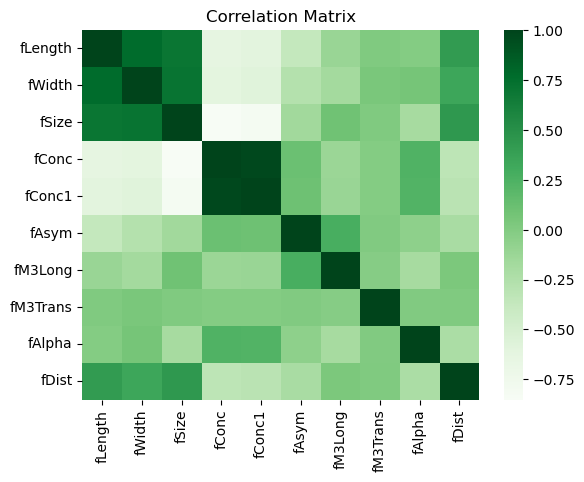

In [65]:
ax = plt.axes()
sns.heatmap(correlation_matrix, cmap='Greens', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

In [47]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [49]:
print(f'Eugenvalues length: {eigenvalues.size}, Original Number of Features: {data_matrix.shape[1]}')

Eugenvalues length: 10, Original Number of Features: 10


In [55]:
indices = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:,indices]

In [57]:
print(eigenvalues.shape)
print(eigenvectors.shape)

(10,)
(10, 10)


In [59]:
information_proportions = eigenvalues / eigenvalues.sum()
information_percents = information_proportions * 100

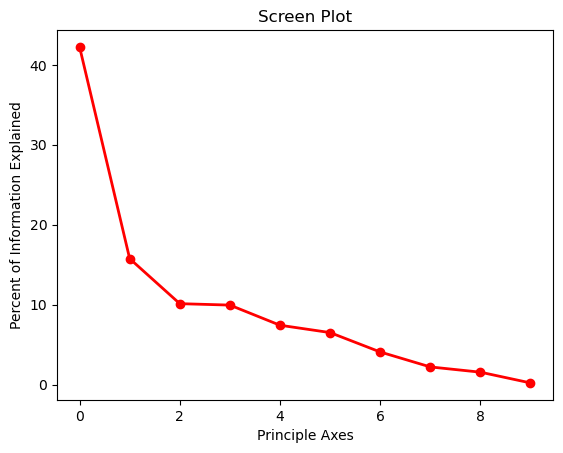

In [63]:
plt.figure()
plt.plot(information_percents, 'ro-', linewidth=2)
plt.title('Screen Plot')
plt.xlabel('Principle Axes')
plt.ylabel('Percent of Information Explained')
plt.show()

In [67]:
cumulatice_information_percents = np.cumsum(information_percents)

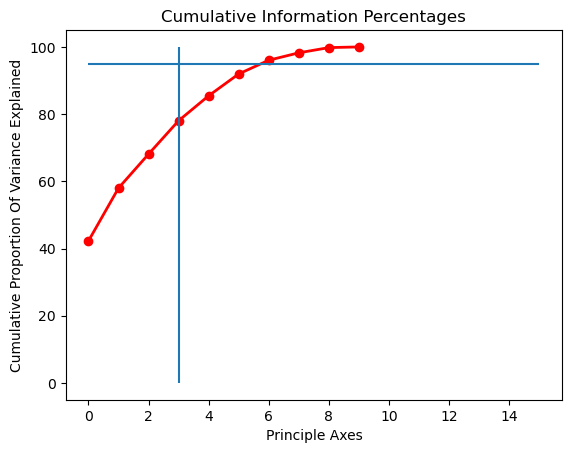

In [75]:
plt.figure()
plt.plot(cumulatice_information_percents, 'ro-', linewidth=2)
plt.hlines(y=95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=100)
plt.title('Cumulative Information Percentages')
plt.xlabel('Principle Axes')
plt.ylabel('Cumulative Proportion Of Variance Explained')
plt.show()